(freq-distr-notebook)=
# Dati e frequenze

Nel 1907 Francis Galton, cugino di Charles Darwin, matematico e statistico autodidatta, geografo, esploratore, teorico della dattiloscopia (ovvero, dell'uso delle impronte digitali a fini identificativi) e dell'eugenetica, scrisse una lettera alla rivista scientifica Nature sulla sua visita alla *Fat Stock and Poultry Exhibition* di Plymouth. Lì vide alcuni membri del pubblico partecipare ad un gioco il cui scopo era quello di indovinare il peso della carcassa di un grande bue che era appena stato scuoiato. Galton si procurò i 787 dei biglietti che erano stati compilati dal pubblico e considerò il valore medio di 547 kg come la "scelta democratica" dei partecipanti, in quanto "ogni altra stima era stata giudicata troppo alta o troppo bassa dalla maggioranza dei votanti". Il punto interessante è che il peso corretto di 543 kg si dimostrò essere molto simile alla "scelta democratica" basata sulle stime dei 787 partecipanti. Galton intitolò la sua lettera a Nature *Vox Populi* (voce del popolo), ma questo processo decisionale è ora meglio conosciuto come la "saggezza delle folle" (*wisdom of crowds*). Possiamo dire che, nel suo articolo del 1907, Galton effettuò quello che ora chiamiamo un riepilogo dei dati, ovvero calcolò un indice sintetico a partire da un insieme di dati. 

In questo capitolo inizieremo ad esaminare le tecniche che sono state sviluppate nel secolo successivo per riassumere le grandi masse di dati con cui sempre più spesso ci dobbiamo confrontare. Vedremo come calcolare e interpretare le distribuzioni di frequenze e i quantili. Vedremo inoltre quali sono le tecniche di visualizzazione che ci consentono di rappresentare questi sommari dei dati mediante dei grafici.

## I dati grezzi
Per introdurre i principali strumenti della statistica descrittiva considereremo qui i dati raccolti da {cite:t}`zetsche_2019future`. Questi ricercatori hanno studiato le aspettative negative quale meccanismo chiave nel mantenimento e nella reiterazione della depressione. {cite:t}`zetsche_2019future` si sono chiesti se individui depressi maturano delle aspettative accurate sul loro umore futuro, oppure se tali aspettative siano distorte negativamente. In uno degli studi riportati viene esaminato un campione costituito da 30 soggetti con almeno un episodio depressivo maggiore e un campione di 37 controlli sani. Gli autori hanno misurato il livello depressivo con il *Beck Depression Inventory* (BDI-II). 

Il BDI-II è uno strumento self-report che consente di valutare la gravità della depressione in  adulti e adolescenti. Il test è stato sviluppato come indicatore della presenza e dell'intensità dei sintomi depressivi nelle ultime due settimane. I 21 item sono valutati su una scala a 4 punti, dove 0 corrisponde al grado più lieve e 3 a quello più grave. Il punteggio totale del test si valuta in base ai seguenti cutoff: 

- 0–13: valori normali o minimi livelli depressivi considerati non significativi dal punto di vista clinico; 
- 14–19: depressione lieve-moderata;
- 20–28: depressione moderata-severa;
- 29–63: livelli estremamente severi di depressione.

Nel seguente esercizio, vogliamo conoscere il livello di depressione BDI-II nel campione di {cite:t}`zetsche_2019future`. 

Importiamo le librerie necessarie.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.constants import golden
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(5.0, 5.0/golden))
plt.style.use('seaborn-darkgrid')
plt.style.use('tableau-colorblind10')
SEED = 12345
rng = np.random.default_rng(SEED)

I dati messi a disposizione da {cite:t}`zetsche_2019future` sono memorizzati nel file `data.mood.csv` contenuto nella directory `data`. La cella seguente legge i contenuti del file e li inserisce nel DataFrame `df`.

In [3]:
df = pd.read_csv("data/data.mood.csv")

Per conoscere le dimensioni del DataFrame utilizzo il metodo `shape()`.

In [4]:
df.shape

(1188, 44)

Il DataFrame ha 1188 righe e 44 colonne. Visualizzo il nome delle colonne con il metodo `.columns`.

In [5]:
df.columns

Index(['Unnamed: 0', 'vpn_nr', 'esm_id', 'group', 'bildung', 'bdi',
       'nr_of_episodes', 'nobs_mood', 'trigger_counter', 'form', 'traurig_re',
       'niedergeschlagen_re', 'unsicher_re', 'nervos_re', 'glucklich_re',
       'frohlich_re', 'mood_sad.5', 'mood_fearful.5', 'mood_neg.5',
       'mood_happy.5', 'cesd_sum', 'rrs_sum', 'rrs_brood', 'rrs_reflect',
       'forecast_sad', 'forecast_fear', 'forecast_neg', 'forecast_happy',
       'recall_sad', 'recall_fear', 'recall_neg', 'recall_happy',
       'diff_neg.fore.5', 'diff_sad.fore.5', 'diff_fear.fore.5',
       'diff_happy.fore.5', 'diff_neg.retro.5', 'diff_sad.retro.5',
       'diff_fear.retro.5', 'diff_happy.retro.5', 'mood_sad5_tm1',
       'mood_neg5_tm1', 'mood_fearful5_tm1', 'mood_happy5_tm1'],
      dtype='object')

Nel presente esercizio, esamineremo solo tre colonne: il codice del soggetto `esm_id`, il gruppo `group` e il valore BDI-II `bdi`. La cella seguente visualizza le prime cinque righe di queste tre colonne.

In [6]:
df = df[["esm_id", "group", "bdi"]]
df.head()

esm_id group   bdi
0      10   mdd  25.0
1      10   mdd  25.0
2      10   mdd  25.0
3      10   mdd  25.0
4      10   mdd  25.0

Notiamo che il valore BDI-II è ripetuto varie volte per ogni soggetto. È dunque necessario semplificare il DataFrame in modo tale da avere un unico valore BDI-II per ogni soggetto. Questo risultato si può ottenere applicando la funzione `drop_duplicates()`. L'argomento `keep='first'` specifica che, di tutte le righe presenti per ciascun soggetto terrà la prima (nel caso presente, sono tutte uguali).

In [7]:
df = df.drop_duplicates(keep="first")

Verifico di avere ottenuto il risultato desiderato.

In [8]:
df.shape

(67, 3)

In [9]:
df

esm_id group   bdi
0         10   mdd  25.0
14         9   mdd  30.0
29         6   mdd  26.0
45         7   mdd  35.0
64        12   mdd  44.0
...      ...   ...   ...
1104      99   ctl   0.0
1120     100   ctl   2.0
1132     104   ctl   0.0
1151     103   ctl   0.0
1170     102   ctl   1.0

[67 rows x 3 columns]

Si noti che il nuovo DataFrame (con 67 righe) conserva il "nome" delle righe (ovvero, l'indice di riga) del DataFrame originario (con 1188 righe). Per esempio, il secondo soggetto (con codice identificativo 9) si trova sulla seconda riga del DataFrame, ma il suo indice di riga è 15. Questo non ha nessuna conseguenza perché non useremo l'indice di riga nelle analisi seguenti.

Esamino i valori BDI-II:

In [10]:
print(*df["bdi"])

25.0 30.0 26.0 35.0 44.0 30.0 22.0 33.0 43.0 43.0 24.0 39.0 19.0 3.0 nan 0.0 25.0 0.0 1.0 31.0 28.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 7.0 30.0 0.0 35.0 0.0 1.0 0.0 2.0 31.0 26.0 0.0 1.0 0.0 0.0 0.0 1.0 36.0 41.0 26.0 35.0 33.0 12.0 28.0 1.0 27.0 34.0 22.0 27.0 1.0 3.0 1.0 5.0 3.0 9.0 0.0 2.0 0.0 0.0 1.0


Noto che c'è un dato mancante `nan`. Usano la funzione `notnull()`, trasformo il DataFrame in modo da escludere tale dato perché altrimenti interferirà con le analisi statistiche successive.

In [11]:
df = df[pd.notnull(df["bdi"])]

Ottengo così il DataFrame finale per gli scopi presenti (66 righe e 3 colonne):

In [17]:
df.shape

(66, 3)

Ottengo i valori BDI-II presentandoli ordinati dal più piccolo al più grande:

In [12]:
print(*df["bdi"].sort_values())


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 5.0 7.0 9.0 12.0 19.0 22.0 22.0 24.0 25.0 25.0 26.0 26.0 26.0 27.0 27.0 28.0 28.0 30.0 30.0 30.0 31.0 31.0 33.0 33.0 34.0 35.0 35.0 35.0 36.0 39.0 41.0 43.0 43.0 44.0


È chiaro dall'elenco precedente che i dati grezzi non sono molto informativi. Nella sezione successiva vedremo come creare una rappresentazione sintetica e comprensibile di questi dati.

## Distribuzioni di frequenze

Uno dei modi che ci consentono di effettuare una sintesi dei dati è quello di generare una *distribuzione di frequenze*. Una distribuzione di frequenze è un riepilogo del conteggio della frequenza con cui le modalità osservate in un insieme di dati si verificano in un intervallo di valori. In altre parole, la distribuzione di frequenze della variabile $X$ corrisponde all'insieme delle frequenze assegnate a ciascun possibile valore di $X$.

Per creare una distribuzione di frequenze possiamo procedere effettuando una partizione delle modalità della variabile di interesse in $m$ classi (denotate con $\Delta_i$) tra loro disgiunte. In tale partizione, la classe $i$-esima coincide con un intervallo di valori aperto a destra $[a_i, b_i)$ o aperto a sinistra $(a_i, b_i]$. Ad ogni classe $\Delta_i$ avente $a_i$ e $b_i$ come limite inferiore e superiore associamo l'ampiezza $b_i - a_i$ (non necessariamente uguale per ogni classe) e il valore centrale $\bar{x}_i$. La scelta delle classi è arbitraria, ma è buona norma non definire classi con un numero troppo piccolo ($< 5$) di osservazioni. Poiché ogni elemento dell'insieme $\{x_i\}_{i=1}^n$ appartiene ad una ed una sola classe $\Delta_i$, possiamo calcolare le quantità elencate di seguito.

-   La *frequenza assoluta* $n_i$ di ciascuna classe, ovvero il numero di osservazioni che ricadono nella classe $\Delta_i$.
    -   Proprietà: $n_1 + n_2 + \dots + n_m = n$.
-   La *frequenza relativa* $f_i = n_i/n$ di ciascuna classe.
    -   Proprietà: $f_1+f_2+\dots+f_m =1$.
-   La *frequenza cumulata* $N_i$, ovvero il numero totale delle osservazioni che ricadono nelle classi fino alla $i$-esima compresa: $N_i = \sum_{i=1}^m n_i.$
-   La *frequenza cumulata relativa* $F_i$, ovvero $F_i = f_1+f_2+\dots+f_m = \frac{N_i}{n} = \frac{1}{n} \sum_{i=1}^m f_i.$

Per ottenere la distribuzione di frequenza assoluta e relativa dei valori BDI-II di {cite:t}`zetsche_2019future` devo prima aggiungere al DataFrame `df` una colonna contenente una variabile categoriale che classifica ciascuna osservazione in una delle quattro classi che descrivono la gravità della depressione:

- 0–13: depressione minima; 
- 14–19: depressione lieve-moderata;
- 20–28: depressione moderata-severa;
- 29–63: depressione severa.

Questo risultato si ottiene usando il metodo `pandas.cut()`. 

In `pandas.cut()`, il primo argomento `x` è un array unidimensionale (lista python,  `numpy.ndarray` o `pandas.Series`) che contiene i dati e il secondo argomento `bins` specifica gli intervalli delle classi. La funzione restituisce un array che specifica la classe di appartenenza di ogni elemento dell'array `x`. L'argomento `include_lowest=True` specifica classi chiuse a destra (nel nostro caso è irrilevante dato che nessuna osservazione coincide con il limite di una classe).

In [53]:
df["bdi_class"] = pd.cut(
    df["bdi"], bins=[0, 13.5, 19.5, 28.5, 63], include_lowest=True)


Esamino il risultato ottenuto.

In [25]:
print(df)


      esm_id group   bdi       bdi_class
0         10   mdd  25.0    (19.5, 28.5]
14         9   mdd  30.0    (28.5, 63.0]
29         6   mdd  26.0    (19.5, 28.5]
45         7   mdd  35.0    (28.5, 63.0]
64        12   mdd  44.0    (28.5, 63.0]
...      ...   ...   ...             ...
1104      99   ctl   0.0  (-0.001, 13.5]
1120     100   ctl   2.0  (-0.001, 13.5]
1132     104   ctl   0.0  (-0.001, 13.5]
1151     103   ctl   0.0  (-0.001, 13.5]
1170     102   ctl   1.0  (-0.001, 13.5]

[66 rows x 4 columns]


Calcolo le frequenze assolute usando il metodo `.value_counts()`:

In [26]:
df["bdi_class"].value_counts()


(-0.001, 13.5]    36
(28.5, 63.0]      17
(19.5, 28.5]      12
(13.5, 19.5]       1
Name: bdi_class, dtype: int64

L'output di `.value_counts` è una tabella delle frequenze assolute, anche se è possibile utilizzare la funzione `pd.crosstab` per ottenere una visualizzazione migliore, in quanto tale funzione restituisce un DataFrame:

In [54]:
abs_freq = pd.crosstab(index=df["bdi_class"], columns=[
                       "Abs. freq."], colnames=[""])
abs_freq


Abs. freq.
bdi_class                 
(-0.001, 13.5]          36
(13.5, 19.5]             1
(19.5, 28.5]            12
(28.5, 63.0]            17

L'argomento di `pd.crosstab` è `index` che viene impostato alla serie di cui vanno calcolate le frequenze assolute; i due rimanenti argomenti influiscono solo sul modo in cui viene visualizzata la tabella delle frequenze: `columns` contiene una lista il cui unico elemento è l'intestazione della colonna delle frequenze, mentre `colnames` viene impostato a una lista contenente una stringa vuota al fine di non visualizzare un'ulteriore etichetta per l'intera tabella.

Essendo l'output di `pd.crosstab` un dataframe, esso può essere manipolato facilmente. Trasformiamo dunque la precedente tabella di frequenze assolute nella corrispondente tabella delle frequenze relative. Le frequenze relative si calcolano dividendo quelle assolute per il numero totale di casi; quest'ultimo è ovviamente uguale alla somma di tutte le frequenze assolute, quindi la tabella delle frequenze relative si può ottenere nel modo seguente:

In [28]:
rel_freq = abs_freq / abs_freq.sum()
rel_freq


Abs. freq.
bdi_class                 
(-0.001, 13.5]    0.545455
(13.5, 19.5]      0.015152
(19.5, 28.5]      0.181818
(28.5, 63.0]      0.257576

Controllo:

In [29]:
rel_freq.sum()


Abs. freq.    1.0
dtype: float64

Si noti che l'etichetta della colonna riporta il nome del DataFrame che è stato manipolato. Per ovviare a questo problema è possibile creare direttamente la tabella delle frequenze relative specificando il valore True per l'argomento `normalize`:

In [30]:
rel_freq = pd.crosstab(
    index=df["bdi_class"], columns=["Rel. freq."], colnames=[""], normalize=True
)
rel_freq


Rel. freq.
bdi_class                 
(-0.001, 13.5]    0.545455
(13.5, 19.5]      0.015152
(19.5, 28.5]      0.181818
(28.5, 63.0]      0.257576

La visualizzazione della tabella può essere migliorata riducendo il numero di cifre visualizzate, applicando ai suoi elementi la funzione `round()`:

In [31]:
rel_freq.round(2)

Rel. freq.
bdi_class                 
(-0.001, 13.5]        0.55
(13.5, 19.5]          0.02
(19.5, 28.5]          0.18
(28.5, 63.0]          0.26

Si noti che, nel caso di stringhe, le righe del DataFrame prodotto da `pd.crosstab()` saranno ordinate alfabeticamente per i valori della prima colonna.

In [55]:
grp_freq = pd.crosstab(index=df["group"], columns=[
                       "Abs. freq."], colnames=[""])
grp_freq


Abs. freq.
group            
ctl            36
mdd            30

Volendo modificare tale ordine è possibile accedere al DataFrame tramite `loc` e specificando come secondo argomento una lista dei valori nell'ordine desiderato:

In [34]:
grp_freq.loc[["mdd", "ctl"], :]

Abs. freq.
group            
mdd            30
ctl            36

In python, il simbolo `:` utilizzato all'interno delle parentesi quadre permette di ottenere uno _slicing_ corrispondente all'intera lista.

### Distribuzioni congiunte

Insiemi di variabili possono anche avere distribuzioni di frequenze, dette *distribuzioni congiunte*. La distribuzione congiunta di un insieme di variabili $V$ è l'insieme delle frequenze di ogni possibile combinazione di valori delle variabili in $V$. Ad esempio, se $V$ è un insieme di due variabili, $X$ e $Y$, ciascuna delle quali può assumere due valori, 1 e 2, allora una possibile distribuzione congiunta di frequenze relative per $V$ è $f(X = 1, Y = 1) = 0.2$, $f(X = 1, Y = 2) = 0.1$, $f(X = 2, Y = 1) = 0.5$, $f(X = 2, Y = 2) = 0.2$. Proprio come con le distribuzioni di frequenze relative di una singola variabile, le frequenze relative di una distribuzione congiunta devono sommare a 1.

Per i dati dell'esempio precedente, la funzione `pd.crosstab` può essere utilizzata anche per produrre questo tipo di tabella: basta indicare le serie corrispondenti alle variabili considerate come valori degli argomenti `index` e `columns`:

In [59]:
bdi_group_abs_freq = pd.crosstab(index=df["bdi_class"], columns=df["group"])

bdi_group_abs_freq


group           ctl  mdd
bdi_class               
(-0.001, 13.5]   36    0
(13.5, 19.5]      0    1
(19.5, 28.5]      0   12
(28.5, 45.0]      0   17

Oppure:

In [60]:
bdi_group_rel_freq = pd.crosstab(
    index=df["bdi_class"], columns=df["group"], normalize=True
)

bdi_group_rel_freq


group                ctl       mdd
bdi_class                         
(-0.001, 13.5]  0.545455  0.000000
(13.5, 19.5]    0.000000  0.015152
(19.5, 28.5]    0.000000  0.181818
(28.5, 45.0]    0.000000  0.257576

Invocando il metodo `plot.bar` sulla tabella, otteniamo un grafico a barre nel quale le barre relative a uno stesso valore `bdi_class` risultino affiancate. Nel caso presente, le due distribuzioni sono completamente separate, quindi non abbiamo mai due barre affiancate: 

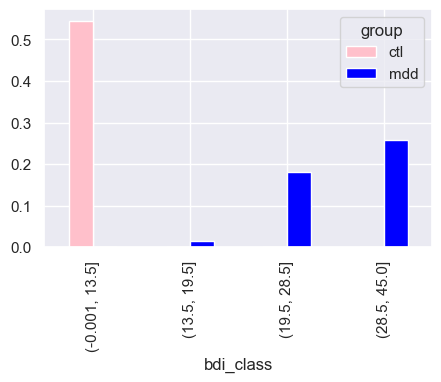

In [61]:
_ = bdi_group_rel_freq.plot.bar(color=["pink", "blue"])


Usando l'argomento `stacked=True`, le barre dei gruppi che si riferiscono a uno stesso valore riportato sull'asse $x$ risulteranno sovrapposte.

Possiamo calcolare le *frequenze marginali* che corrispondono ai totali calcolati rispettivamente sulle singole colonne e sulle singole righe.  

In [50]:
pd.crosstab(index=df["bdi_class"], columns=df["group"], margins=True)

group           ctl  mdd  All
bdi_class                    
(-0.001, 13.5]   36    0   36
(13.5, 19.5]      0    1    1
(19.5, 28.5]      0   12   12
(28.5, 45.0]      0   17   17
All              36   30   66

Le frequenze congiunte trovate nell'esempio precedente erano frequenze assolute, ma è immediato estendere tale concetto a quello delle frequenze congiunte relative. Queste si possono calcolare dividendo le frequenze assolute per il numero totale di osservazioni, oppure utilizzando il parametro `normalize` in `pd.crosstab`, che però ora ha diversi valori possibili. Specificando `all` vengono calcolate le frequenze relative:

In [51]:
pd.crosstab(index=df["bdi_class"], columns=df["group"],
            margins=True, normalize="all")


group                ctl       mdd       All
bdi_class                                   
(-0.001, 13.5]  0.545455  0.000000  0.545455
(13.5, 19.5]    0.000000  0.015152  0.015152
(19.5, 28.5]    0.000000  0.181818  0.181818
(28.5, 45.0]    0.000000  0.257576  0.257576
All             0.545455  0.454545  1.000000

Indicando `columns` viene generata una tabella in cui tutte le colonne sommano al valore unitario:

In [53]:
pd.crosstab(
    index=df["bdi_class"], columns=df["group"], margins=True, normalize="columns"
)


group           ctl       mdd       All
bdi_class                              
(-0.001, 13.5]  1.0  0.000000  0.545455
(13.5, 19.5]    0.0  0.033333  0.015152
(19.5, 28.5]    0.0  0.400000  0.181818
(28.5, 45.0]    0.0  0.566667  0.257576

Usando `index` si otterrà una tabella in cui i valori su ogni riga sommano a 1:

In [54]:
pd.crosstab(index=df["bdi_class"], columns=df["group"],
            margins=True, normalize="index")


group                ctl       mdd
bdi_class                         
(-0.001, 13.5]  1.000000  0.000000
(13.5, 19.5]    0.000000  1.000000
(19.5, 28.5]    0.000000  1.000000
(28.5, 45.0]    0.000000  1.000000
All             0.545455  0.454545

## Istogramma

I dati sintetizzati in una distribuzione di frequenze possono essere rappresentati graficamente in un istogramma. Un istogramma si costruisce riportando sulle ascisse i limiti delle classi $\Delta_i$ e sulle ordinate i valori della funzione costante a tratti

$$
\varphi_n(x)= \frac{f_i}{b_i-a_i}, \quad x\in \Delta_i,\, i=1, \dots, m
$$

che misura la *densità della frequenza relativa* della variabile $X$ nella classe $\Delta_i$, ovvero il rapporto fra la frequenza relativa $f_i$ e l'ampiezza ($b_i - a_i$) della classe. In questo modo il rettangolo dell'istogramma associato alla classe $\Delta_i$ avrà un'area proporzionale alla frequenza relativa $f_i$. Si noti che l'area totale dell'istogramma delle frequenze relative è data della somma delle aree dei singoli rettangoli e quindi vale 1.0.

Per fare un esempio, costruisco un istogramma per i valori BDI-II di {cite:t}`zetsche_2019future`. Con i quattro intervalli individuati dai cut-off del BDI-II creo una prima versione dell'istogramma -- si notino le frequenze assolute sull'asse delle ordinate.

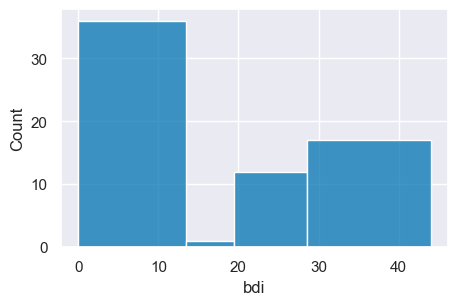

In [36]:
bdi_bins = [0, 13.5, 19.5, 28.5, 44]
_ = sns.histplot(data=df, x="bdi", stat="count", bins=bdi_bins)


Per creare un istogramma nel quale la somma delle aree delle barre sia unitaria devo specificare `stat='density'`:

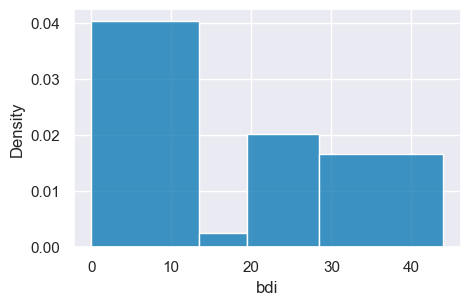

In [37]:
_ = sns.histplot(data=df, x="bdi", stat="density", bins=bdi_bins)

Anche se nel caso presente è sensato usare ampiezze diverse per gli intervalli delle classi, in generale gli istogrammi si costruiscono utilizzando intervalli riportati sulle ascisse con un'ampiezza uguale. 

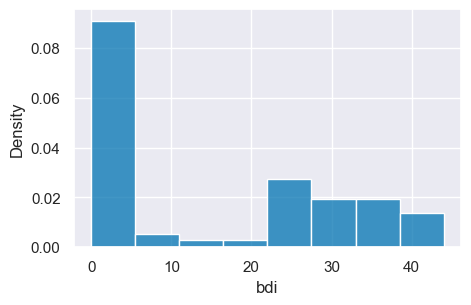

In [38]:
_ = sns.histplot(data=df, x="bdi", stat="density")

## Kernel density plot

Il confronto tra le figure precedenti rende chiaro il limite dell'istogramma: il profilo dell'istogramma è arbitrario, in quanto dipende dal numero e dall'ampiezza delle classi. Questo rende difficile l'interpretazione.

Il problema precedente può essere alleviato utilizzando una rappresentazione alternativa della distribuzione di frequenza, ovvero la stima della densità della frequenza dei dati (detta anche stima *kernel di densità*). Un modo semplice per pensare a tale rappresentazione, che in inglese va sotto il nome di *kernel density plot* (cioè i grafici basati sulla stima kernel di densità), è quello di immaginare un grande campione di dati, in modo che diventi possibile definire un enorme numero di classi di equivalenza di ampiezza molto piccola, le quali non risultino vuote. In tali circostanze, la funzione di densità empirica non è altro che il profilo *lisciato* dell'istogramma. La stessa idea si applica anche quando il campione è piccolo. In tali circostanze, invece di raccogliere le osservazioni in barre come negli istogrammi, lo stimatore di densità kernel colloca una piccola "gobba" (*bump*), determinata da un fattore $K$ (kernel) e da un parametro $h$ di smussamento detto ampiezza di banda (*bandwidth*), in corrispondenza di ogni osservazione, quindi somma le gobbe risultanti generando una curva smussata.

L'interpretazione che possiamo attribuire al kernel density plot è simile a quella che viene assegnata agli istogrammi: l'area sottesa al kernel density plot in un certo intervallo rappresenta la proporzione di casi della distribuzione che hanno valori compresi in quell'intervallo.

Aggiungiamo un kernel density plot all'istogramma dei valori BDI-II di {cite:t}`zetsche_2019future`.

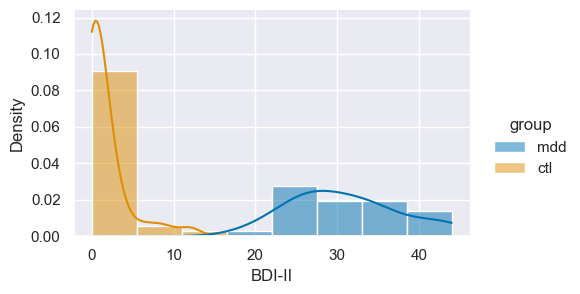

In [47]:
sns.displot(
    data=df, x="bdi", hue="group", stat="density", kde=True, aspect=1.618, height=3.1
)
_ = plt.xlabel("BDI-II")


## Forma di una distribuzione

In generale, la forma di una distribuzione descrive come i dati si distribuiscono intorno ai valori centrali. Distinguiamo tra distribuzioni simmetriche e asimmetriche, e tra distribuzioni unimodali o multimodali. Un'illustrazione grafica è fornita nella @fig-shape-distr. Nel pannello 1 la distribuzione è unimodale con asimmetria negativa; nel pannello 2 la distribuzione è unimodale con asimmetria positiva; nel pannello 3 la distribuzione è simmetrica e unimodale; nel pannello 4 la distribuzione è bimodale.

```{image} images/shape_distribution.png
:alt: shape
:class: bg-primary mb-1
:width: 420px
:align: center
```

Il kernel density plot dei valori BDI-II nel campione di {cite:t}`zetsche_2019future` è bimodale. Ciò indica che le osservazioni della distribuzione si addensano in due cluster ben distinti: un gruppo di osservazioni tende ad avere valori BDI-II bassi, mentre l'altro gruppo tende ad avere BDI-II alti. Questi due cluster di osservazioni corrispondono al gruppo di controllo e al gruppo clinico nel campione di dati esaminato da {cite:t}`zetsche_2019future`.

## Indici di posizione

### Quantili

La descrizione della distribuzione dei valori BDI-II di {cite:t}`zetsche_2019future` può essere facilitata dalla determinazione di alcuni valori caratteristici che sintetizzano le informazioni contenute nella distribuzione di frequenze. Si dicono *quantili* (o *frattili*) quei valori caratteristici che hanno le seguenti proprietà. I *quartili* sono quei valori che ripartiscono i dati $x_i$ in quattro parti ugualmente numerose (pari ciascuna al 25% del totale). Il primo quartile, $q_1$, lascia alla sua sinistra il 25% del campione pensato come una fila ordinata (a destra quindi il 75%). Il secondo quartile $q_2$ lascia a sinistra il 50% del campione (a destra quindi il 50%). Esso viene anche chiamato *mediana*. Il terzo quartile lascia a sinistrail 75% del campione (a destra quindi il 25%). Secondo lo stesso criterio, si dicono *decili* i quantili di ordine $p$ multiplo di 0.10 e *percentili* i quantili di ordine $p$ multiplo di 0.01.

Come si calcolano i quantili? Consideriamo la definizione di quantile *non interpolato* di ordine $p$ $(0 < p < 1)$. Si procede innanzitutto ordinando i dati in ordine crescente, $\{x_1, x_2, \dots, x_n\}$. Ci sono poi due possibilità. Se il valore $np$ non è intero, sia $k$ l'intero tale che $k < np < k + 1$ -- ovvero, la parte intera di $np$. Allora $q_p = x_{k+1}.$ Se $np = k$ con $k$ intero, allora $q_p = \frac{1}{2}(x_{k} + x_{k+1}).$ Se vogliamo calcolare il primo quartile $q_1$, ad esempio, utilizziamo $p = 0.25$. Dovendo calcolare gli altri quantili basta sostituire a $p$ il valore appropriato.

Gli indici di posizione, tra le altre cose, hanno un ruolo importante, ovvero vengono utilizzati per creare una rappresentazione grafica di una distribuzione di valori che è molto popolare e può essere usata in alternativa ad un istogramma (in realtà vedremo poi come possa essere combinata con un istogramma). Tale rappresentazione va sotto il nome di box-plot.
ì
Per fare un esempio, consideriamo i nove soggetti del campione clinico di {cite:t}`zetsche_2019future` che hanno riportato un unico episodio di depressione maggiore. Per tali soggetti i valori ordinati del BDI-II (per semplicità li chiameremo $x$) sono i seguenti: 19, 26, 27, 28, 28, 33, 33, 41, 43. Per il calcolo del secondo quartile (non interpolato), ovvero per il calcolo della mediana, dobbiamo considerare la quantità $np = 9 \cdot 0.5 = 4.5$, non intero. Quindi, $q_1 = x_{4 + 1} = 27$. Per il calcolo del quantile (non interpolato) di ordine $p = 2/3$ dobbiamo considerare la quantità $np = 9 \cdot 2/3 = 6$, intero. Quindi, $q_{\frac{2}{3}} = \frac{1}{2} (x_{6} + x_{7}) = \frac{1}{2} (33 + 33) = 33$.

Usiamo `numpy` per trovare la soluzione dell'esercizio precedente.

In [ ]:
import numpy as np

x = [19, 26, 27, 28, 28, 33, 33, 41, 43]
np.quantile(x, 2 / 3)


## Mostrare i dati

### Diagramma a scatola

Il *diagramma a scatola* (o box plot) è uno strumento grafico utile al fine di ottenere informazioni circa la dispersione e l'eventuale simmetria o asimmetria di una distribuzione. Per costruire un box-plot si rappresenta sul piano cartesiano un rettangolo (cioè la "scatola") di altezza arbitraria la cui base corrisponde alla dist intanza interquartile (IQR = $q_{0.75} - q_{0.25}$). La linea interna alla scatola rappresenta la mediana $q_{0.5}$. Si tracciano poi ai lati della scatola due segmenti di retta i cui estremi sono detti "valore adiacente" inferiore e superiore. Il valore adiacente inferiore è il valore più piccolo tra le osservazioni che risulta maggiore o uguale al primo quartile meno la distanza corrispondente a 1.5 volte la distanza interquartile. Il valore adiacente superiore è il valore più grande tra le osservazioni che risulta minore o uguale a $Q_3+1.5$ IQR. I valori esterni ai valori adiacenti (chiamati *valori anomali*) vengono rappresentati individualmente nel box plot per meglio evidenziarne la presenza e la posizione.

```{image} images/boxplot.png
:alt: fishy
:class: bg-primary mb-1
:width: 520px
:align: center
```

Utilizziamo un box-plot per rappresentare graficamente la distribuzione dei punteggi BDI-II nel gruppo dei pazienti e nel gruppo di controllo usandi i dati di {cite:t}`zetsche_2019future`.

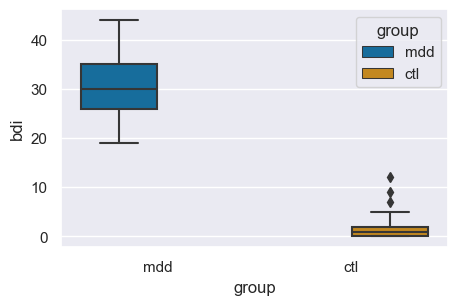

In [48]:
_ = sns.boxplot(data=df, x="group", y="bdi", hue="group")


Un risultato migliore si ottiene mostrando anche i dati grezzi.

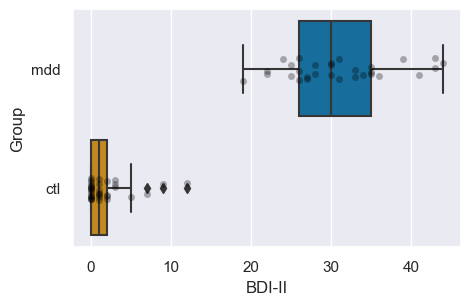

In [51]:
sns.boxplot(y="group", x="bdi", data=df)
sns.stripplot(y="group", x="bdi", color="black", alpha=0.3, data=df)
plt.ylabel("Group")
plt.xlabel("BDI-II")

### Grafico a violino

I grafici a violino (violin plot) prendono lo spunto dai box-plot ma riportano il profilo di densità dei valori osservati sotto forma di kernel density plot. La forma tipica di questi grafici, quella che dà loro il nome, deriva dal fatto che il kernel density plot dei dati è riportato simmetricamente da entrambi i lati della distribuzione. Ad un violin plot possono essere sovrapposti al bisogno un boxplot o un grafico a punti (dotplot), a testimonianza del fatto che è possibile integrare diverse visualizzazioni dei dati.

Un violin plot per i valori BDI-II di ciascuno dei due gruppi di soggetti esaminati da {cite:t}`zetsche_2019future` è fornito di seguito. La linea curva simmetrica è l'istogramma lisciato (*kernel density plot*) che abbiamo descritto in precedenza. In questa rappresentazione del violin plot, al suo interno, è stato collocato un box plot. Per completezza, al violin plot abbiamo anche sovrapposto un grafico a punti (dotplot).

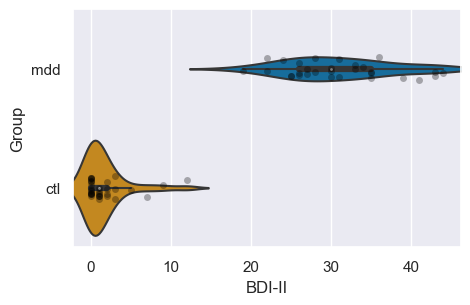

In [52]:
sns.violinplot(data=df, x="bdi", y="group")
sns.stripplot(y="group", x="bdi", color="black", alpha=0.3, data=df)
plt.ylabel("Group")
plt.xlabel("BDI-II")


## Commenti e considerazioni finali 

Una distribuzione è una rappresentazione del modo in cui le diverse modalità di una variabile si distribuiscono nelle unità statistiche che compongono il campione o la popolazione oggetto di studio. Il modo più diretto per trasmettere descrivere le proprietà della distribuzione di una variabile discreta è quello di fornire una rappresentazione grafica della distribuzione di frequenza. In seguito vedremo una corrispondente rappresentazione che viene usata nel caso delle variabili continue.


## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w